In [6]:
from scipy.stats import norm, ttest_1samp, ttest_ind, t as T
import numpy as np
from random import choice
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
population = [3, 5, 7, 8]
population_mean = np.mean(population)

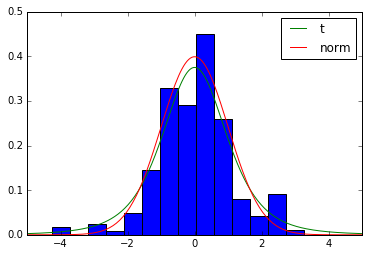

In [33]:
def sampling_t(sample_size):    
    total_iterations = 10000
    ts = []
    for i in range(total_iterations):
        sample = [choice(population) for _ in range(sample_size)]
        if np.var(sample) == 0:
            continue
        t = (np.mean(sample) - population_mean) / np.std(sample, ddof=1) * \
            np.sqrt(sample_size)
        ts.append(t)
    plt.xlim(-5, 5)
    plt.hist(ts, normed=True, bins=30)
    x = np.linspace(-5, 5, 200)
    plt.plot(x, T.pdf(x, df=sample_size - 1), label="t")
    plt.plot(x, norm.pdf(x), label="norm")
    plt.legend()
sampling_t(5)

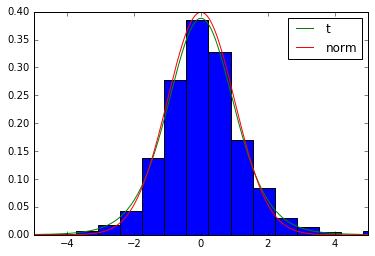

In [34]:
sampling_t(10)

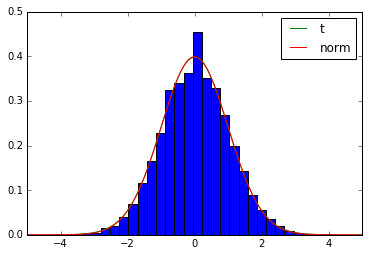

In [35]:
sampling_t(100)

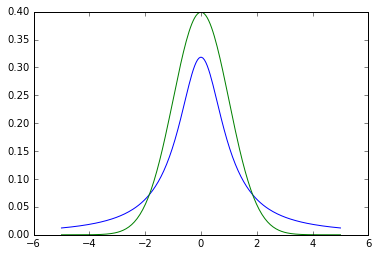

In [39]:
def t_and_norm(n):
    x = np.linspace(-5, 5, 200)
    plt.plot(x, T.pdf(x, df=n - 1), label="t")
    plt.plot(x, norm.pdf(x), label="norm")
t_and_norm(2)

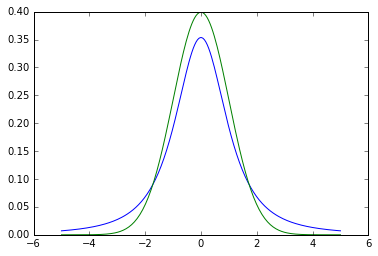

In [40]:
t_and_norm(3)

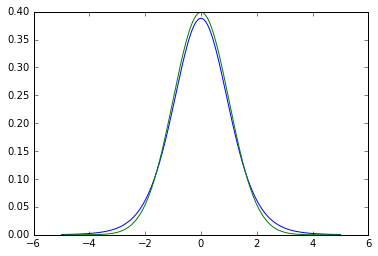

In [41]:
t_and_norm(10)

In [43]:
ttest_1samp([5, 10, 4, 5], 10)
# test null: true mean is 10 against alternative: true mean is not 10

Ttest_1sampResult(statistic=-2.9541957835039856, pvalue=0.059822385197866791)

In [45]:
ttest_ind([5, 10, 4, 5], [12, 15, 10, 12])
# test null: true means are the same against alternative: true means are different

Ttest_indResult(statistic=-3.6727658015579383, pvalue=0.010419906259606442)